In [1]:
import numpy as np
import h5py
from matplotlib import pyplot as plt
import glob
import re

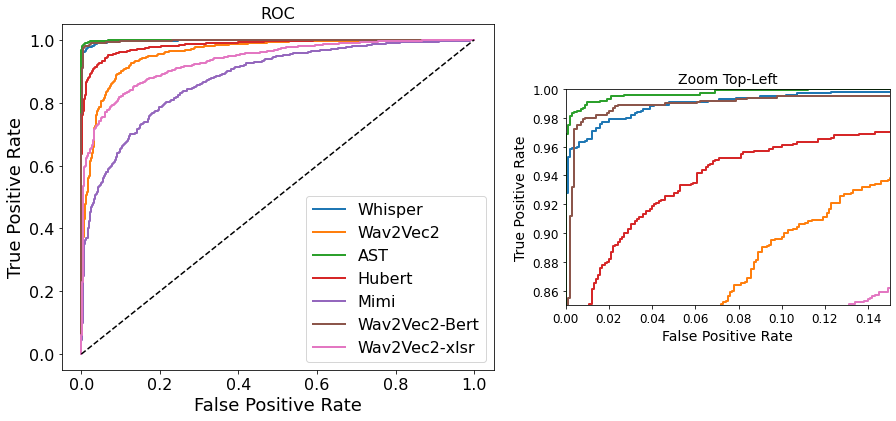

In [2]:
import h5py
import matplotlib.pyplot as plt

# Path to the HDF5 file with ROC data
roc_file_Whisper = "logs/validation_roc_whisper.hdf5"
roc_file_Wav2Vec2 = "logs/validation_roc_wav2vec2.hdf5"
roc_file_AST = "logs/validation_roc_ast.hdf5"
roc_file_Hubert = "logs/validation_roc_hubert.hdf5"
roc_file_Mimi = "logs/validation_roc_mimi.hdf5"
roc_file_Wav2Vec2_bert = "logs/validation_roc_wav2vec2-bert.hdf5"
roc_file_Wav2Vec2_xlsr = "logs/validation_roc_wav2vec2-xlsr.hdf5"

fig = plt.figure(figsize=(10, 6))  # wider to accommodate inset outside
ax_main = fig.add_axes([0.05, 0.1, 0.6, 0.8])  # [left, bottom, width, height]
ax_zoom = fig.add_axes([0.75, 0.25, 0.45, 0.5])

with h5py.File(roc_file_Whisper, "r") as f:
    fpr = f["fpr"][:]
    tpr = f["tpr"][:]
    ax_main.plot(fpr, tpr, lw=2, label="Whisper")
    ax_zoom.plot(fpr, tpr, lw=2)

with h5py.File(roc_file_Wav2Vec2, "r") as f:
    fpr = f["fpr"][:]
    tpr = f["tpr"][:]
    ax_main.plot(fpr, tpr, lw=2, label="Wav2Vec2")
    ax_zoom.plot(fpr, tpr, lw=2)

with h5py.File(roc_file_AST, "r") as f:
    fpr = f["fpr"][:]
    tpr = f["tpr"][:]
    ax_main.plot(fpr, tpr, lw=2, label="AST")
    ax_zoom.plot(fpr, tpr, lw=2)

with h5py.File(roc_file_Hubert, "r") as f:
    fpr = f["fpr"][:]
    tpr = f["tpr"][:]
    ax_main.plot(fpr, tpr, lw=2, label="Hubert")
    ax_zoom.plot(fpr, tpr, lw=2)

with h5py.File(roc_file_Mimi, "r") as f:
    fpr = f["fpr"][:]
    tpr = f["tpr"][:]
    ax_main.plot(fpr, tpr, lw=2, label="Mimi")
    ax_zoom.plot(fpr, tpr, lw=2)

with h5py.File(roc_file_Wav2Vec2_bert, "r") as f:
    fpr = f["fpr"][:]
    tpr = f["tpr"][:]
    ax_main.plot(fpr, tpr, lw=2, label="Wav2Vec2-Bert")
    ax_zoom.plot(fpr, tpr, lw=2)

with h5py.File(roc_file_Wav2Vec2_xlsr, "r") as f:
    fpr = f["fpr"][:]
    tpr = f["tpr"][:]
    ax_main.plot(fpr, tpr, lw=2, label="Wav2Vec2-xlsr")
    ax_zoom.plot(fpr, tpr, lw=2)

ax_main.plot([0, 1], [0, 1], "k--")
ax_main.set_xlabel("False Positive Rate", fontsize=18)
ax_main.set_ylabel("True Positive Rate", fontsize=18)
ax_main.tick_params(labelsize=16)
ax_main.legend(loc="lower right", fontsize=16)
ax_main.set_title("ROC", fontsize=16)

ax_zoom.plot([0, 1], [0, 1], "k--")
ax_zoom.set_xlim(0.0, 0.15)
ax_zoom.set_ylim(0.85, 1.0)
ax_zoom.set_title("Zoom Top-Left", fontsize=14)
ax_zoom.set_xlabel("False Positive Rate", fontsize=14)
ax_zoom.set_ylabel("True Positive Rate", fontsize=14)
ax_zoom.tick_params(labelsize=12)

plt.savefig('figures/validation_ROC.png', bbox_inches='tight', facecolor='w', transparent=False, dpi=200)
plt.show()

In [12]:
def plotter(path, title, file_name):
    paths = sorted(glob.glob(path), key=lambda x: int(re.search(r'_(\d+)\.hdf5$', x).group(1)))
    bounds = [int(f.split('_')[-2]) for f in paths]
    low_bounds = [20] + bounds[:-1]
    labels = [f"Mass Range: {low}-{high} $M_\\odot$" for low, high in zip(low_bounds, bounds)]
    
    fig = plt.figure(figsize=(10, 6))  # wider to accommodate inset outside

    # Main ROC plot
    ax_main = fig.add_axes([0.05, 0.1, 0.6, 0.8])  # [left, bottom, width, height]
    ax_zoom = fig.add_axes([0.75, 0.25, 0.45, 0.5])
    
    for i, path in enumerate(paths):
        with h5py.File(path, "r") as f:
            fpr = f["fpr"][:]
            tpr = f["tpr"][:]
        ax_main.plot(fpr, tpr, lw=2, label=labels[i])
        ax_zoom.plot(fpr, tpr, lw=2)
        
    ax_main.plot([0, 1], [0, 1], "k--")
    ax_main.set_xlabel("False Positive Rate", fontsize=18)
    ax_main.set_ylabel("True Positive Rate", fontsize=18)
    ax_main.tick_params(labelsize=16)
    ax_main.legend(loc="lower right", fontsize=16)
    ax_main.set_title(title, fontsize=16)
    
    # ax_zoom.plot([0, 1], [0, 1], "k--")
    ax_zoom.set_xlim(0.0, 0.15)
    ax_zoom.set_ylim(0.85, 1.0)
    ax_zoom.set_title("Zoom Top-Left", fontsize=14)
    ax_zoom.set_xlabel("False Positive Rate", fontsize=14)
    ax_zoom.set_ylabel("True Positive Rate", fontsize=14)
    ax_zoom.tick_params(labelsize=12)
    
    plt.savefig(f'figures/{file_name}.png', bbox_inches='tight', facecolor='w', transparent=False, dpi=200)
    plt.show()

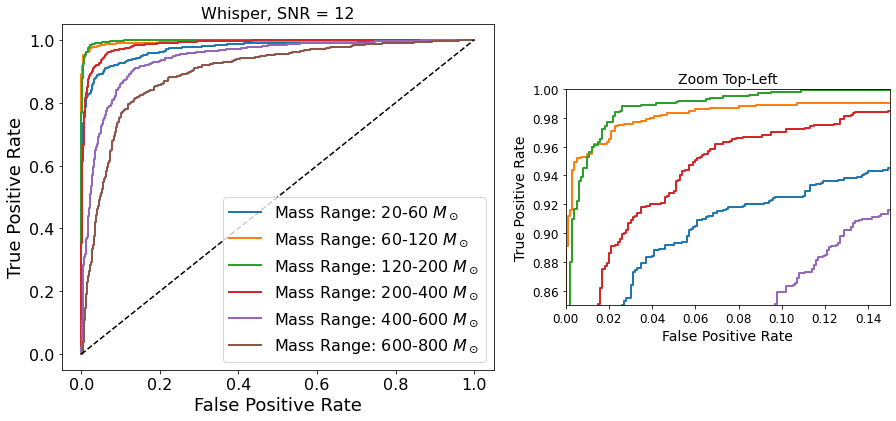

In [13]:
plotter("logs/whisper*eval_roc_*.hdf5", "Whisper, SNR = 12", "whisper_all_masses")

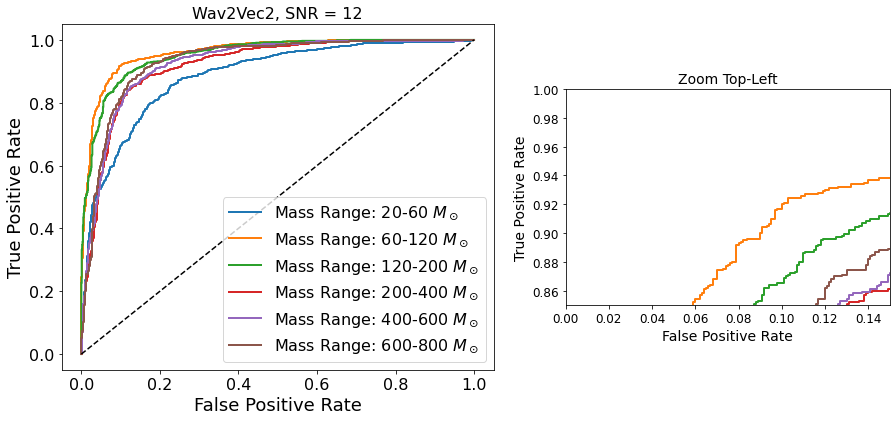

In [6]:
plotter("logs/wav2vec2_*eval_roc_*.hdf5", "Wav2Vec2, SNR = 12", "wav2vec2_all_masses")

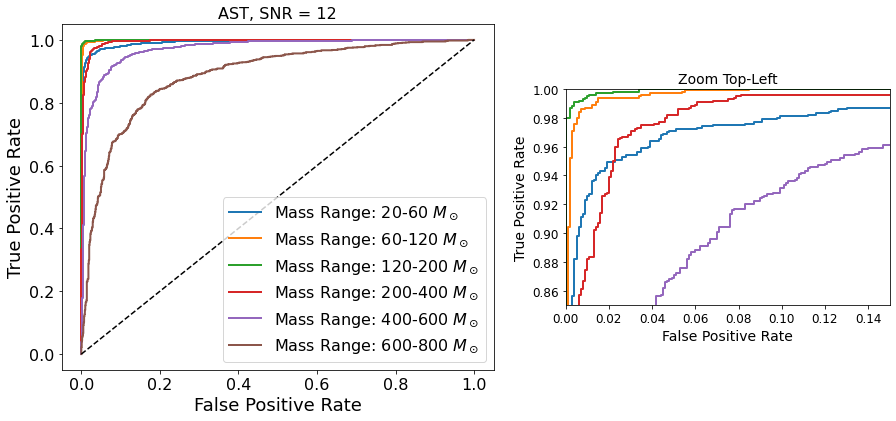

In [7]:
plotter("logs/ast*eval_roc_*.hdf5", "AST, SNR = 12", "ast_all_masses")

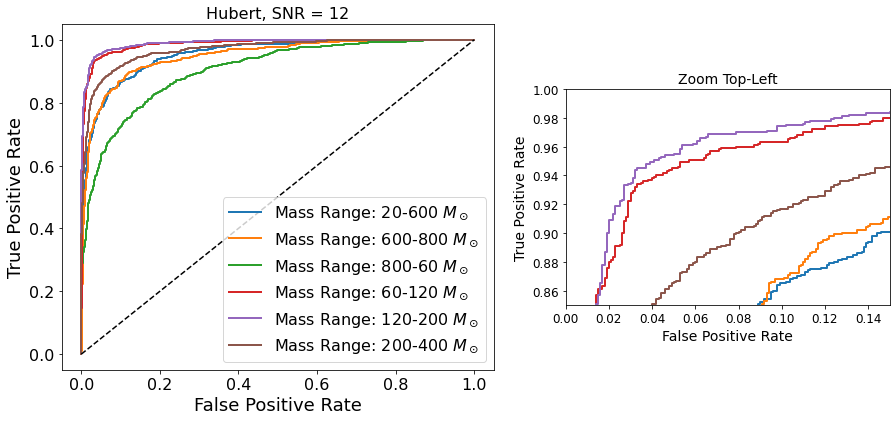

In [8]:
plotter("logs/hubert*eval_roc_*.hdf5", "Hubert, SNR = 12", "hubert_all_masses")

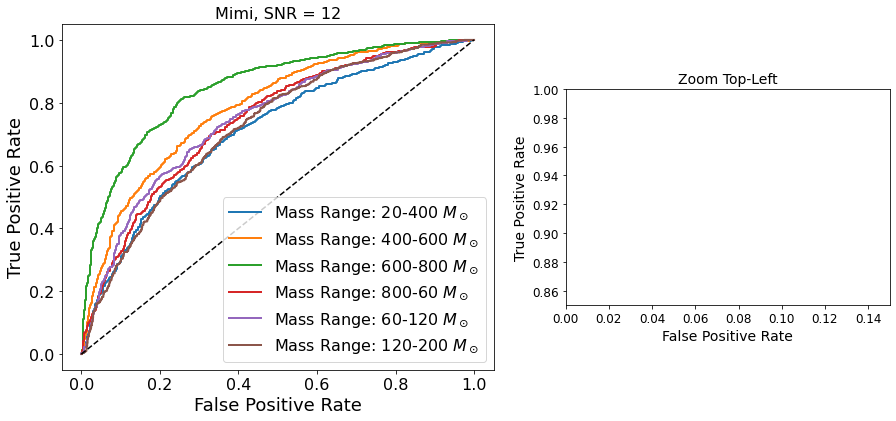

In [9]:
plotter("logs/mimi*eval_roc_*.hdf5", "Mimi, SNR = 12", "mimi_all_masses")

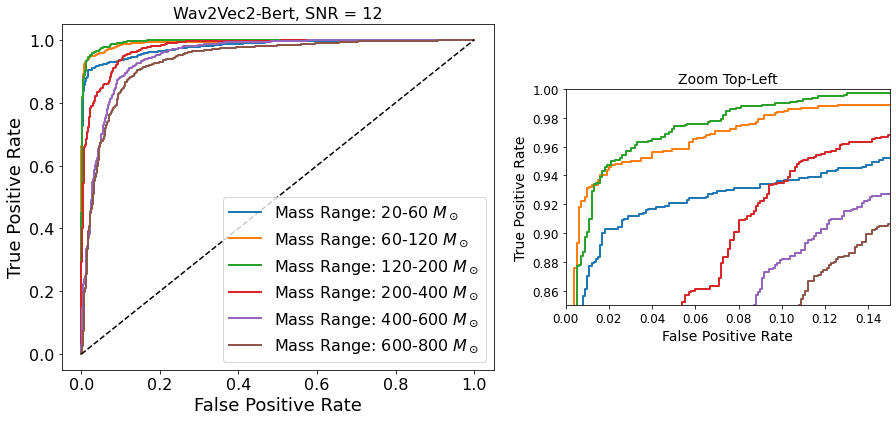

In [10]:
plotter("logs/*-bert*eval_roc_*.hdf5", "Wav2Vec2-Bert, SNR = 12", "wav2vec2_bert_all_masses")

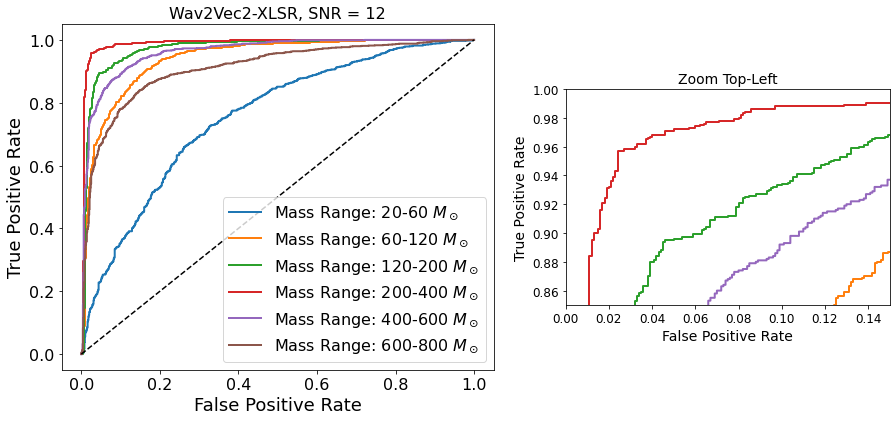

In [11]:
plotter("logs/*-xlsr*eval_roc_*.hdf5", "Wav2Vec2-XLSR, SNR = 12", "wav2vec2_xlsr_all_masses")

In [21]:
def plotter_2(path, title, file_name):
    paths = sorted(glob.glob(path), key=lambda x: int(re.search(r'_(\d+)\.hdf5$', x).group(1)))
    bounds = [int(f.split('_')[-2]) for f in paths]
    low_bounds = [20] + bounds[:-1]
    labels = [f"Mass Range: {low}-{high} $M_\odot$" for low, high in zip(low_bounds, bounds)]

    fig = plt.figure(figsize=(10, 6))
    ax_main = fig.add_axes([0.05, 0.1, 0.6, 0.8])  # [left, bottom, width, height]
    ax_zoom = fig.add_axes([0.75, 0.25, 0.45, 0.5])
    
    for i, path in enumerate(paths):
        model = path.split("_")[0].split("/")[1]
        with h5py.File(path, "r") as f:
            fpr = f["fpr"][:]
            tpr = f["tpr"][:]
        ax_main.plot(fpr, tpr, lw=2, label=model)
        ax_zoom.plot(fpr, tpr, lw=2)
    
    ax_main.plot([0, 1], [0, 1], "k--")
    ax_main.set_xlabel("False Positive Rate", fontsize=18)
    ax_main.set_ylabel("True Positive Rate", fontsize=18)
    ax_main.tick_params(labelsize=16)
    ax_main.legend(loc="lower right", fontsize=16)
    ax_main.set_title(title, fontsize=16)

    ax_zoom.plot([0, 1], [0, 1], "k--")
    ax_zoom.set_xlim(0.0, 0.15)
    ax_zoom.set_ylim(0.85, 1.0)
    ax_zoom.set_title("Zoom Top-Left", fontsize=14)
    ax_zoom.set_xlabel("False Positive Rate", fontsize=14)
    ax_zoom.set_ylabel("True Positive Rate", fontsize=14)
    ax_zoom.tick_params(labelsize=12)
    
    plt.savefig(f'figures/{file_name}.png', bbox_inches='tight', facecolor='w', transparent=False, dpi=200)
    plt.show()

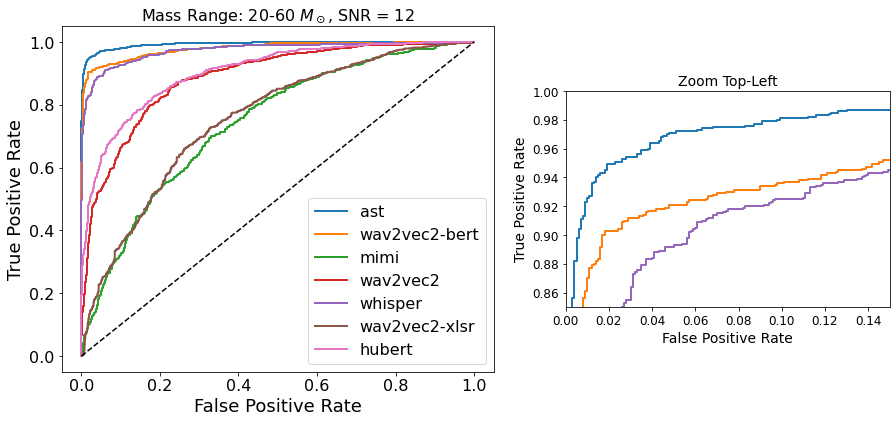

In [22]:
plotter_2("logs/*eval_roc_60_*.hdf5", f"Mass Range: 20-60 $M_\odot$, SNR = 12", "20_60_all_models")

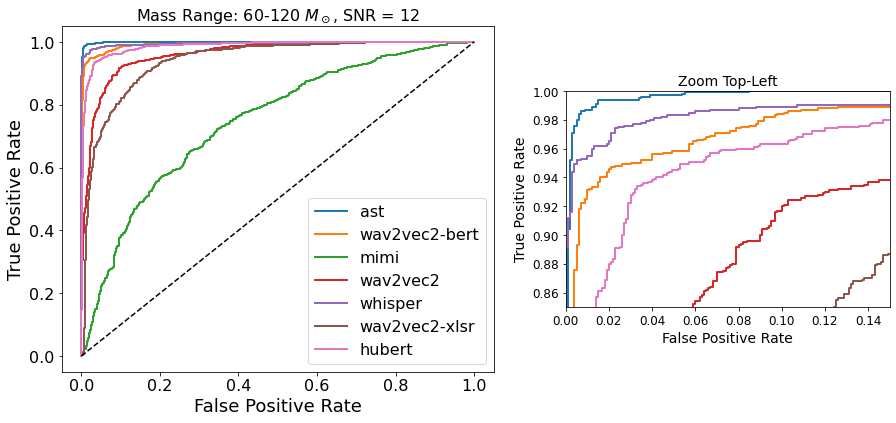

In [23]:
plotter_2("logs/*eval_roc_120_*.hdf5", f"Mass Range: 60-120 $M_\odot$, SNR = 12", "60_120_all_models")

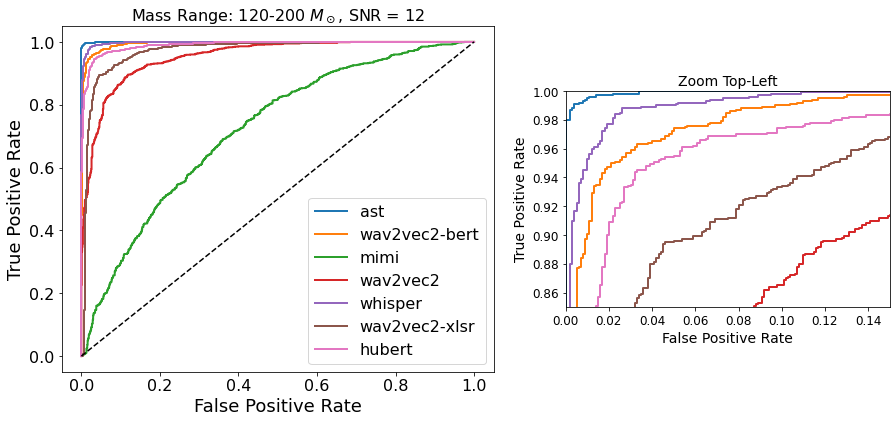

In [24]:
plotter_2("logs/*eval_roc_200_*.hdf5", f"Mass Range: 120-200 $M_\odot$, SNR = 12", "120_200_all_models")

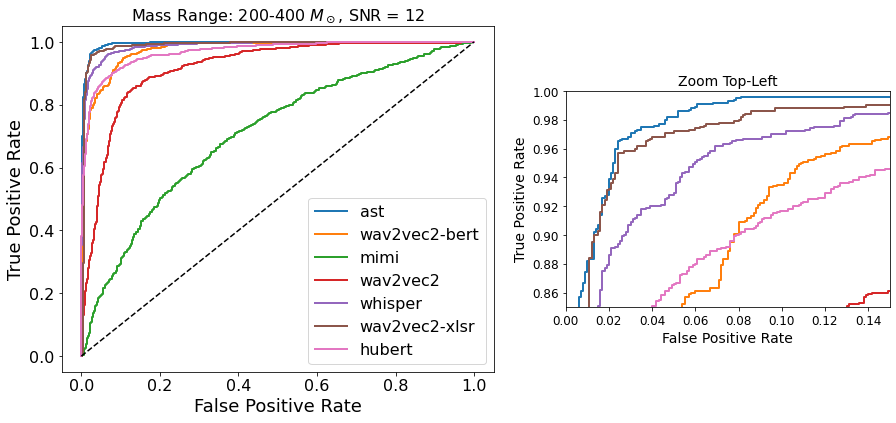

In [25]:
plotter_2("logs/*eval_roc_400_*.hdf5", f"Mass Range: 200-400 $M_\odot$, SNR = 12", "200_400_all_models")

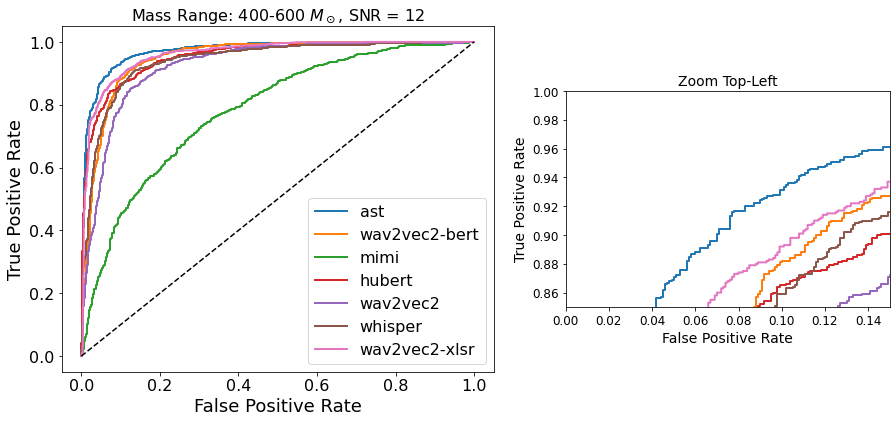

In [26]:
plotter_2("logs/*eval_roc_600_*.hdf5", f"Mass Range: 400-600 $M_\odot$, SNR = 12", "400_600_all_models")

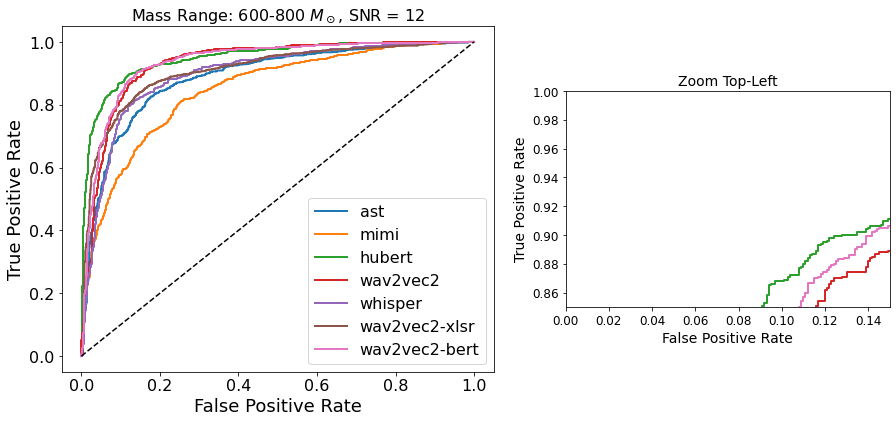

In [27]:
plotter_2("logs/*eval_roc_800_*.hdf5", f"Mass Range: 600-800 $M_\odot$, SNR = 12", "600_800_all_models")